In [46]:
%matplotlib inline

In [47]:
import os 
import pathlib

In [48]:
from dateutil.relativedelta import relativedelta

In [49]:
from matplotlib import pyplot as plt

In [50]:
import numpy as np
import pandas as pd 

In [51]:
import xarray as xr

In [52]:
HOME = pathlib.Path.home()

In [53]:
dict_vars = {}
dict_vars['PRECIP'] = 'tprate'
dict_vars['SST'] = 'sst'
dict_vars['T2M'] = 't2m'
dict_vars['Z850'] = 'z850'
dict_vars['Z500'] = 'z500'

In [54]:
def demean(x): 
    return x - x.mean('time')

In [55]:
model = 'UKMO'

In [56]:
varcode = 'Z500'

In [57]:
dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode

In [58]:
fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))

In [59]:
fname

[PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/hindcasts/UKMO/Z500/Z500_hindcasts_1993_2016_UKMO.nc')]

In [60]:
dset_raw = xr.open_dataset(fname[0])

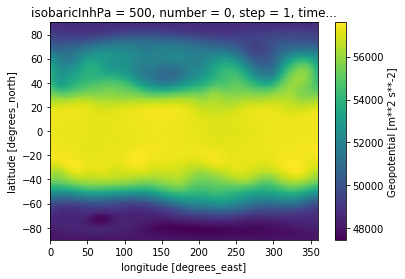

In [61]:
dset_raw.isel(time=0, step=0, number=0)[dict_vars[varcode]].plot()

In [ ]:
# # for model in ['ukmo','meteo_france','cmcc','dwd']: 
# for model in ['ECMWF']: 

#     for varcode in ['Z500']: 
#         var_name = dict_vars[varcode]
#         dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode
#         fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))
#         if len(fname) > 1: 
#             print("problem with the filelist for {} {}".format(model, varcode))
#             pass
#         else: 
#             fname = fname[0]
#             fout = os.path.basename(fname)
#             fout_rm = fout.split('.')[0] + '_seasonal.' + fout.split('.')[1]
#             fout_rm_anoms = fout.split('.')[0] + '_seasonal_anomalies.' + fout.split('.')[1]
    
#             dset = xr.open_dataset(fname)
#             dset_rm = dset.rolling({'step':3}, min_periods=3).mean()
#             dset_rm = dset_rm.sel(step=slice(3,None))
#             dset_rm_anoms = dset_rm.groupby('time.month').apply(demean)
#             lt_arr = []
#             for t in dset_rm.time.data: 
#                 lt = np.array([pd.to_datetime(t) + relativedelta(months=3), \
#                                pd.to_datetime(t) + relativedelta(months=4), \
#                                pd.to_datetime(t) + relativedelta(months=5)])
#                 lt_arr.append(lt)
#             lt_arr = np.array(lt_arr)
#             dset_rm['forecast_valid_time'] = (('time','step'), lt_arr)
#             dset_rm_anoms['forecast_valid_time'] = (('time','step'), lt_arr)
            
#             dset_rm.to_netcdf(dpath / fout_rm)
#             dset_rm_anoms.to_netcdf(dpath / fout_rm_anoms)
            
#             dset_rm.close()
#             dset_rm_anoms.close()
#             dset.close()

/home/nicolasf/anaconda3/envs/pangeo/lib/python3.6/site-packages/xarray/core/nanops.py:159: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


In [62]:
varcode='Z500'

In [63]:
model = 'UKMO'

In [64]:
var_name = dict_vars[varcode]
dpath = HOME / 'drives' / 'auck_projects' / 'END19101' / 'Working' / 'data' / 'hindcasts' / model / varcode
fname = list(dpath.glob("{}_hindcasts_1993_2016_{}.nc".format(varcode, model)))
if len(fname) > 1: 
    print("problem with the filelist for {} {}".format(model, varcode))
    pass
else: 
    fname = fname[0]
    fout = os.path.basename(fname)
    fout_rm = fout.split('.')[0] + '_seasonal.' + fout.split('.')[1]
    fout_rm_anoms = fout.split('.')[0] + '_seasonal_anomalies.' + fout.split('.')[1]

    dset = xr.open_dataset(fname)
    dset_rm = dset.rolling({'step':3}, min_periods=3).mean()
    dset_rm = dset_rm.sel(step=slice(3,None))
    dset_rm_anoms = dset_rm.groupby('time.month').apply(demean)
    lt_arr = []
    for t in dset_rm.time.data: 
        lt = np.array([pd.to_datetime(t) + relativedelta(months=3), \
                       pd.to_datetime(t) + relativedelta(months=4), \
                       pd.to_datetime(t) + relativedelta(months=5)])
        lt_arr.append(lt)
    lt_arr = np.array(lt_arr)
    dset_rm['forecast_valid_time'] = (('time','step'), lt_arr)
    dset_rm_anoms['forecast_valid_time'] = (('time','step'), lt_arr)
    
    dset_rm.to_netcdf(dpath / fout_rm)
    dset_rm_anoms.to_netcdf(dpath / fout_rm_anoms)

    dset_rm.close()
    dset_rm_anoms.close()
    dset.close()    

In [65]:
fout_rm_anoms

'Z500_hindcasts_1993_2016_UKMO_seasonal_anomalies.nc'

In [28]:
dpath

PosixPath('/home/nicolasf/drives/auck_projects/END19101/Working/data/hindcasts/ECMWF/Z500')